# Network Science project
## Political Facebook pages

By:
<p> Annika Altoja
<p> Kelli Kukk
<p> Kristin Petersel

## 1. Descriptive analysis
The dataset is from: https://www.kaggle.com/rozemberczki/musae-facebook-pagepage-network

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
edges = pd.read_csv('musae_facebook_edges.csv')
edges.head()

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [ ]:
nodes = pd.read_csv('musae_facebook_target.csv')
nodes.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [ ]:
G_unweighted_undirected = nx.from_pandas_edgelist(edges, source='id_1', target='id_2')

###Number of components

In [ ]:
nx.algorithms.components.number_connected_components(G_unweighted_undirected)

1

###Graph

In [ ]:
plt.figure(3,figsize=(20,20))
nx.draw_networkx(G_unweighted_undirected, with_labels = False)

###Min, Max, Average degree

In [ ]:
N, K = G_unweighted_undirected.order(), G_unweighted_undirected.size()
avg_deg = float(K) / N
avg_deg

7.610235870048954

In [ ]:
all_degrees = G_unweighted_undirected.degree()
degr_top4 = sorted(degree_centrUU, key=degree_centrUU.get, reverse=True)[:4]
#print(degr_top4)
for i in degr_top4:
  print(nodes[nodes["id"] == i]["page_name"], ", Degree:", all_degrees[i])

[16895, 19743, 21729, 14497]
16895    U.S. Army
Name: page_name, dtype: object , Degree: 709
19743    The White House
Name: page_name, dtype: object , Degree: 678
21729    The Obama White House
Name: page_name, dtype: object , Degree: 659
14497    U.S. Army Chaplain Corps
Name: page_name, dtype: object , Degree: 650


In [ ]:
# import collections
# import matplotlib.pyplot as plt
# degree_sequence = sorted([d for n, d in G_unweighted_undirected.degree()], reverse=True)  # degree sequence
# degreeCount = collections.Counter(degree_sequence)
# deg, cnt = zip(*degreeCount.items())


# fig, ax = plt.subplots()
# plt.figure(figsize=(16,12))
# plt.bar(deg, cnt, width=0.80, color="b")
# plt.title("Degree Histogram")
# plt.ylabel("Count")
# plt.xlabel("Degree")

# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg);


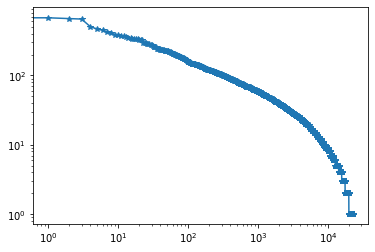

In [ ]:
plt.loglog(degree_sequence,marker='*')
plt.show()

###Edge density

In [ ]:
nx.classes.function.density(G_unweighted_undirected)
#The edge density is 0.00067, which means that 0.067% of possible edges in the network exist in this network. It is the ratio of existing edges over possible ones.

0.000677398715568023

###Clustering coefficient

In [ ]:
nx.average_clustering(G_unweighted_undirected)
#The clustering coefficient says that 35.9% of the node neighbours are connected with each other in average. This mean that in avarage "35.9% of your liked pages like your other liked pages".

0.3597383824426942

###Diameter

In [ ]:
#nx.diameter(G_unweighted_undirected) 

###Average path length

In [ ]:
nx.average_shortest_path_length(G_unweighted_undirected)

4.973703570580348

###Degree centrality

In [ ]:
degree_centrUU = nx.degree_centrality(G_unweighted_undirected)
degree_top4 = sorted(degree_centrUU, key=degree_centrUU.get, reverse=True)[:4]
print(degree_top4)
for i in degree_top4:
  print(nodes[nodes["id"] == i]["page_name"], ", Degree centrality:", degree_centrUU[i])

[16895, 19743, 21729, 14497]
16895    U.S. Army
Name: page_name, dtype: object , Degree centrality: 0.0315545863189283
19743    The White House
Name: page_name, dtype: object , Degree centrality: 0.030174907650540747
21729    The Obama White House
Name: page_name, dtype: object , Degree centrality: 0.029329298144109662
14497    U.S. Army Chaplain Corps
Name: page_name, dtype: object , Degree centrality: 0.028928746272642306


###Betweenness centrality

In [ ]:
betweenness_centralityUU = nx.betweenness_centrality(G_unweighted_undirected)
for i in sorted(betweenness_centralityUU, key=betweenness_centralityUU.get, reverse=True)[:4]:
  #print(node, betweenness_centralityUU[node])
  print(nodes[nodes["id"] == i]["page_name"], ", Betweenness centrality:", betweenness_centralityUU[i])

##KarateClub

In [ ]:
!pip install karateclub
from karateclub import LabelPropagation
model = LabelPropagation()
model.fit(G_unweighted_undirected)
cluster_membership = model.get_memberships()
cluster_membership

##Communities with Louvain

In [ ]:
import community as community_louvain
lst_m = community_louvain.best_partition(G_unweighted_undirected)
print(len(set(lst_m.values())))

63
